<a href="https://colab.research.google.com/github/Kavya-Mudham/coffee-roaster-landin/blob/main/titanic_weekend_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q pandas numpy matplotlib seaborn scikit-learn


In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()          # shows the first 5 rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape     # prints (rows, columns)  →  expected: (891, 12)
df.info()    # shows column names and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Basic snapshot
print("Shape:", df.shape)          # rows, columns
display(df.describe())            # numeric summary
display(df['Survived'].value_counts())   # class balance


Shape: (891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,count
Survived,
0,549
1,342


In [8]:
df.isna().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


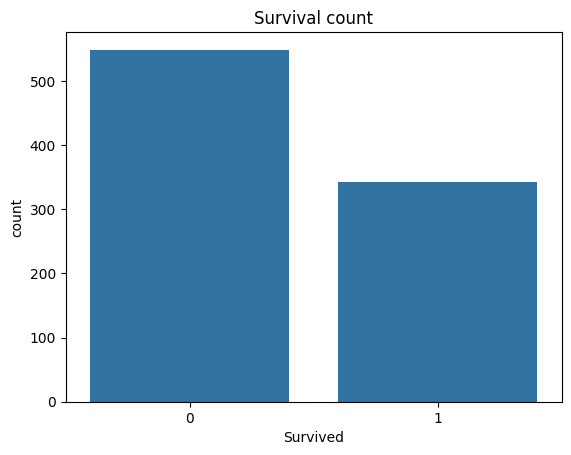

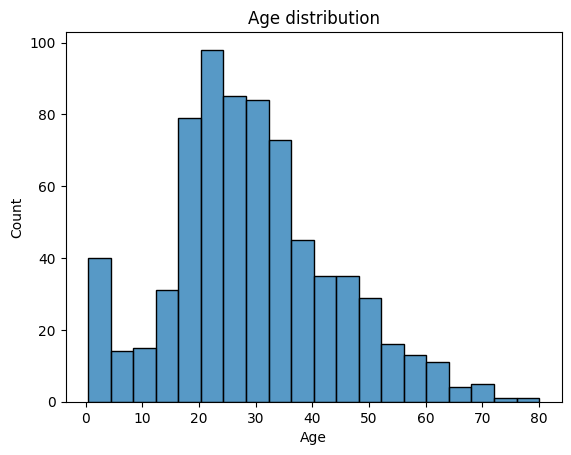

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival bar chart
sns.countplot(x='Survived', data=df)
plt.title('Survival count')
plt.show()

# Age distribution
sns.histplot(df['Age'].dropna(), bins=20)
plt.title('Age distribution')
plt.show()


**Initial observations**
- About 38 % of passengers survived.
- ~20 % of Age values are missing.
- Fares are highly skewed: most are low, a few very high.


In [10]:
# 5-A  >>>  make a working copy  (keeps the original df just in case)
titanic = df.copy()

# 5-B  >>>  HANDLE MISSING VALUES
# 1) Age: replace NaN with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# 2) Embarked: replace NaN with the most common port
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# 3) Cabin: > 75 % missing → drop the whole column
titanic.drop(columns=['Cabin'], inplace=True)

# 5-C  >>>  DROP “ID-like” OR TEXT HEAVY COLUMNS
titanic.drop(columns=['PassengerId',        # random identifier
                      'Ticket',             # messy alphanumerics
                      'Name'], inplace=True)  # full name not useful yet

# 5-D  >>>  CONVERT CATEGORICAL TEXT → NUMBERS
#   get_dummies() turns each category into its own 0/1 column.
titanic = pd.get_dummies(
    titanic,
    columns=['Sex', 'Embarked'],   # columns to encode
    drop_first=True                # avoids duplicate-info columns
)

# 5-E  >>>  QUICK CHECK:   any gaps left?
print("Remaining missing values:\n", titanic.isna().sum())

# -----------------------------------------------------------
# 5-F  >>>  SEPARATE FEATURES (X) AND TARGET (y)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

print("\nFeature matrix shape:", X.shape)


Remaining missing values:
 Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

Feature matrix shape: (891, 8)


<ipython-input-10-64850f6afe0a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
<ipython-input-10-64850f6afe0a>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1) keep 20 % of the rows for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,   # ensures reproducible split
    stratify=y         # preserves the 0/1 balance in both sets
)

print("Train shape :", X_train.shape)
print("Test  shape :", X_test.shape)


Train shape : (712, 8)
Test  shape : (179, 8)


In [14]:
# Option B – use an f-string
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nDetailed report:\n", classification_report(y_test, y_pred))


Accuracy: 0.804

Confusion matrix:
 [[98 12]
 [23 46]]

Detailed report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [15]:
import pandas as pd

importance = (
    pd.Series(log_reg.coef_[0], index=X.columns)
      .sort_values(ascending=False)
)
importance


,0
Embarked_Q,0.278320
Fare,0.002255
Age,-0.038464
Parch,-0.071496
SibSp,-0.243809
Embarked_S,-0.381616
Pclass,-1.090476
Sex_male,-2.555755


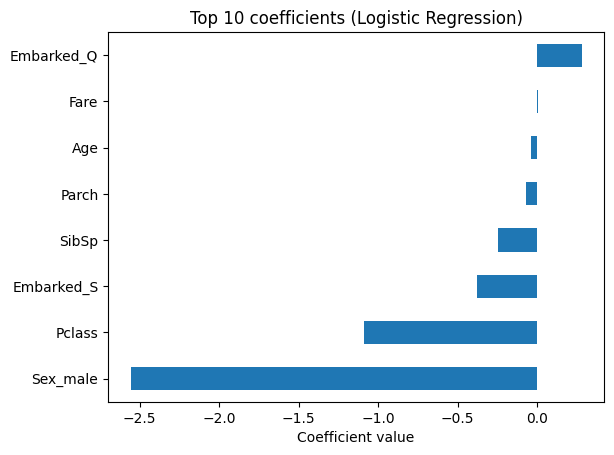

In [16]:
import matplotlib.pyplot as plt

importance.head(10).plot(kind='barh')
plt.title('Top 10 coefficients (Logistic Regression)')
plt.xlabel('Coefficient value')
plt.gca().invert_yaxis()   # largest at top
plt.show()
